<a href="https://colab.research.google.com/github/yingzibu/ODE/blob/main/learn/two_compartment_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

https://blog.djnavarro.net/posts/2023-12-19_solving-two-compartment-pk-models/

In [48]:
k01 = 0.3; ka = k01
k12 = 0.2
k21 = 0.1
k10 = 0.3

def analytic_solution(time, k01=k01, k12=k12, k21=k21, k10=k10):
    ks = k10 + k12 + k21
    delta = np.sqrt(ks**2 - 4 * k10 * k21)
    alpha = (ks + delta) / 2
    beta  = (ks - delta) / 2

    A = (alpha - k21) / (alpha - beta)
    B = -(beta - k21) / (alpha - beta)
    A_term = A * np.exp(-alpha * time) * (np.exp(time * (alpha - k01)) - 1)
    B_term = B * np.exp(-beta * time) * (np.exp(time * (beta - k01)) - 1)

    A_term *= k01 / (alpha - k01)
    B_term *= k01 / (beta - k01)
    return A_term + B_term



My calculation:

eigenvalues : $-ka, -\alpha, -\beta$, in which $\alpha + \beta = k_{10}+k_{12}+k_{21}$ and $\alpha \beta = k_{10}k_{21}$


let $a = k10, b = k12, c = k21$

eigenvectors:

$\lambda_1 = -k_a, \mathbf{v}_1 = [(a-Ka)(c-Ka)/Ka - b, c-ka, b]^\top$

$\lambda_2 = - \alpha, \mathbf{v}_2 = [0, c-\alpha, b]^\top$

$\lambda_3 = -\beta, \mathbf{v}_3 = [0, c-\beta, b]^\top$

In [49]:
def my_solution(t, a=k10, b=k12, c=k21, ka=ka, D = 1):
    ks = k10 + k12 + k21
    delta = np.sqrt(ks**2 - 4 * k10 * k21)
    alpha = (ks + delta) / 2
    beta  = (ks - delta) / 2

    v1 = np.array([[(a-ka)*(c-ka)/ka -b],
                   [c-ka],
                   [b]])
    v2 = np.array([[0], [c-alpha], [b]])
    v3 = np.array([[0], [c-beta], [b]])

    C1 = D / v1[0]
    C2 = -C1 * (ka - beta) / (alpha - beta)
    C3 = C1 * (ka - alpha) / (alpha - beta)

    # A = C1 exp(-ka t) v1 + C2 exp (-\alpha t) v2 + C3 exp (-\beta t)

    central_A = C1 * np.exp(-ka * t) * v1[1] + C2 * np.exp(-alpha * t) * v2[1] + C3 * np.exp(-beta * t) * v3[1]
    return central_A

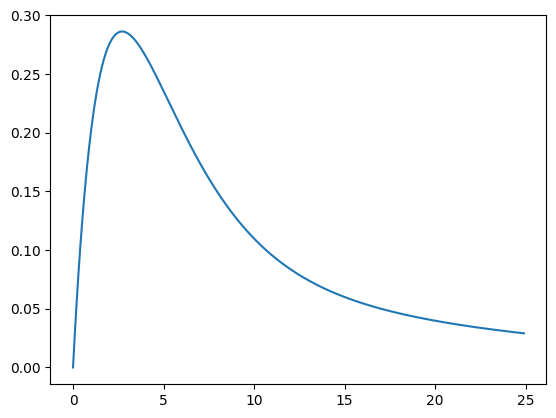

In [50]:
import matplotlib.pyplot as plt
time = np.arange(0, 25, 0.1)
amount = [analytic_solution(t) for t in time]
plt.plot(time, amount)

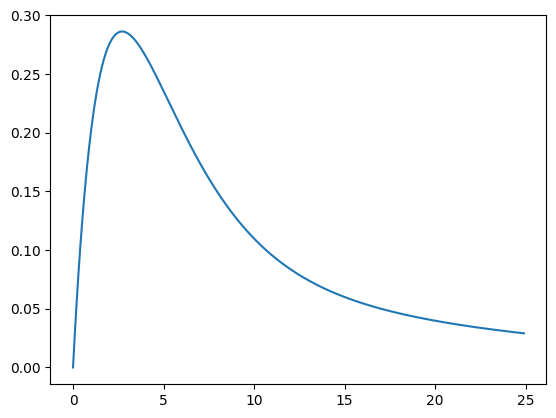

In [51]:
import matplotlib.pyplot as plt
time = np.arange(0, 25, 0.1)
amount = [my_solution(t) for t in time]
plt.plot(time, amount)